In [1]:
from pylab import *
from numpy import random
import time
%matplotlib inline

In [2]:
def my_perceptron(input1, input2, w1, w2, theta):
    # Define the activity of the perceptron, x.
    x = input1*w1 + input2*w2 + theta
    
    # Apply a binary threshold,
    if x > 0:
        return 1
    else:
        return 0

In [3]:
def known_answer(slope, intercept, x, y):

  yline = slope*x + intercept  # Compute y-value on the line.
  if y > yline:                # If the input y value is above the line,
      return 1                 # ... indicate this with output = 1;
  else:                        # Otherwise, the input y is below the line,
      return 0

In [4]:
x,y = 0.7,3
slope = 2
intercept = 1
correct_answer = known_answer(slope, intercept, x, y)
print(correct_answer)

1


In [5]:
def feedforward(x, y, wx, wy, wb):

  # Fix the bias.
  bias = 1

  # Define the activity of the neuron, activity.
  activity = x*wx + y*wy + wb*bias
  
  # Apply the binary threshold,
  if activity > 0:
      return 1
  else:
      return 0

In [6]:
x,y = 0.7,3
wx,wy,wb = 3*[0.5]
perceptron_guess = feedforward(x, y, wx, wy, wb)
print(perceptron_guess)

1


In [7]:
error = correct_answer - perceptron_guess
print(error)

0


In [8]:
learning_constant = 0.01

In [9]:
wx = wx + error*x   *learning_constant
wy = wy + error*y   *learning_constant
wb = wb + error*1   *learning_constant

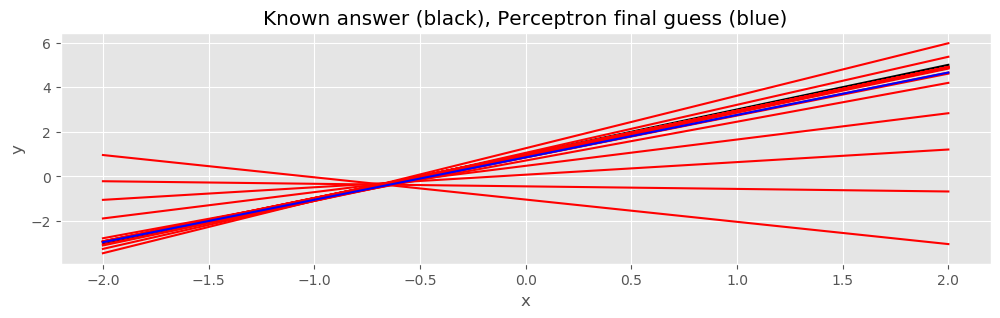

In [10]:
slope     = 2;                      # Define the line with slope, 
intercept = 1;                      # ... and intercept.

wx,wy,wz = 3*[0.5];                 # Choose initial values for the perceptron's weights

learning_constant = 0.01;           # And, set the learning constant.

estimated_slope = zeros(2000)    # Variables to hold the perceptron estimates.
estimated_intercept = zeros(2000)

for k in arange(2000):           # For 2000 iteractions,
    x = random.randn(1);         # Choose a random (x,y) point in the plane
    y = random.randn(1);
                                    # Step 1: Calculate known answer.
    correct_answer = known_answer(slope, intercept, x, y);
    
                                    # Step 2. Ask perceptron to guess an answer.
    perceptron_guess = feedforward(x, y, wx, wy, wb);
    
                                    # Step 3. Compute the error.
    error = correct_answer - perceptron_guess;
    
                                    # Step 4. Adjust weights according to error.
    wx = wx + error*x*learning_constant;
    wy = wy + error*y*learning_constant;
    wb = wb + error*1*learning_constant;
     
    estimated_slope[k] = -wx/wy;    # Compute estimated slope from perceptron.
    estimated_intercept[k] = -wb/wy;# Compute estimated intercept from perceptron.

# Display the results! ------------------------------------------------------------------------
x_range = linspace(-2,2,100);                  # For a range of x-values,
fig, ax = subplots()
ax.plot(x_range, slope*x_range+intercept, 'k')    # ... plot the true line,

for k in range(1,2000,100):                       # ... and plot some intermediate perceptron guess
    ax.plot(x_range, estimated_slope[k]*x_range+estimated_intercept[k], 'r')
                                                  # ... and plot the last perceptron guess
ax.plot(x_range, estimated_slope[-1]*x_range+estimated_intercept[-1], 'b')
xlabel('x')
ylabel('y')
title('Known answer (black), Perceptron final guess (blue)');